<h1 align = 'center'> Boom Bikes

    
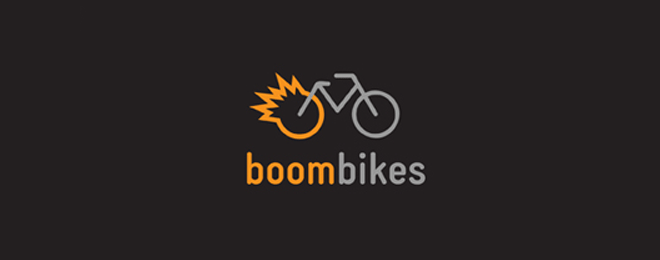

### Problem Statment:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

##### The company wants to know :
- Which variables are significant in predicting the demands for shred bikes.
- How well those variables describe the bike demands.

###  Importing required modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Importing statsmodel to get the detailed statistics summary of the trained model

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing sklearn required modules for performing Linear Regression

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [ ]:
#  Reading Dataset
df = pd.read_csv('../input/boombikes/day.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

 ### Data Cleaning
 - All the columns contains 0 null values
 - dteday columns needs to get converted into datatime format as well as the name of the column should also be standardised
 - instant columns cantains the pre-populated index, we can drop this column as it is of no use
 - Season and year need to be converted into its actuall categorical value at first

In [ ]:
df.drop('instant', axis=1, inplace=True)

In [ ]:
df.dteday = pd.to_datetime(df.dteday)

### Maping the numerical values to its respective description
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : (1:Jan,2:Feb,3:Mar,...,12:Dec)
- weekdays : days(1:'Monday',2:'Tuesday',3:'Wednesday',....,0:'Sunday')
- weathersit : climate(1:'Clear', 2:'Cloudy', 3:'LightSnow Rain', 4:'HeavysSnow Rain')

In [ ]:
# Year
df.yr = df.yr.map({1: 2019, 0 : 2018})
# Season
df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Month
df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'March',4:'April',
                            5:'May',6:'June',7:'July',8:'Aug',9:'Sep',
                            10:'Oct',11:'Nov',12:'Dec'})
# weekday
df.weekday =df.weekday.map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',
                                  5:'Friday',6:'Saturday',0:'Sunday',})

### weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
df.weathersit =df.weathersit.map({1:'Clear', 2:'Cloudy', 3:'LightSnow Rain', 4:'HeavysSnow Rain'})

In [ ]:
print("Season :- {}".format(df.season.unique()))
print("Years :- {}".format(df.yr.unique()))
print("Months :- {}".format(df.mnth.unique()))
print("Weekday :- {}".format(df.weekday.unique()))
print("Weather Situation :- {}".format(df.weathersit.unique()))

#### Looking to the weather situation we can say that the rider never rented a boom bike during a heavy rain or during storm which was expected

In [ ]:
df.head()

#### Changing name of the columns as desired

In [ ]:
df.rename(columns = {'dteday':'date','yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True)

#### Let see the dataset information

In [ ]:
df.info()

**As we can see that the categorical columns have been changed from integer type to object type as well as the date data type has been changed to Datetime data type**

In [ ]:
# Statistical Summary
df.describe()

### Data Exploration

##### Do we have any repetative date in the Dataset?

In [ ]:
df.groupby('date').agg({'date':'count'}).shape

So, the total no's of rows comes out to be 730 after grouping on the date column which is same as the nos of rows in the actual dataset so we don't have any repetative dates in our dataset

Summarizing the date column in the dataset

In [ ]:
print('dataset starting date = {}'.format(df.date.min().date()))
print('dataset ending date = {}'.format(df.date.max().date()))
s = df.date.min().date()
e = df.date.max().date()
print("No's of days between max and min date = {}".format((e-s).days))

In [ ]:
total_days = df.groupby(['weathersit','workingday']).agg({'workingday':'count'})
total_days.rename(columns={'workingday':'count of days'}, inplace = True)

In [ ]:
total_days.pivot_table(index=['weathersit','workingday'],
               margins=True,
               margins_name='total',  # defaults to 'All'
               aggfunc=sum)
# total_days

Earlier while looking into the unique values of the weather situation we stated that the riders don't use the bike rental service during storm or heavy Rain which seems to be right as expected but on looking to the total no's of days on which the bike has been rented we can say that the firm never faced the Heavy Rain or storm situation

So, we don't have enough data for the heavy rain situation to conclude any statement but ideally the providers should avoid renting out their bikes during this situation also take an additional steps to face this situation in the future

#### lets see the spread of the renters data across different weather situation using bee swarm plot

In [ ]:
plt.figure(figsize=(16,6))
sns.swarmplot(x="weathersit", y="count", hue="workingday",
                   data=df, palette="Set1", dodge=True)
plt.title('Climatic Condition Vs Count of the Renters')
plt.show()

From above plot we can state that during clear weather the numbers of riders renting the Bikes are more as compare to the Mist/Cloudy weather
- we can see that the riders use to access the services more during Mist/cloudy or Clear weather
- during light snow/light rain and the user won't prefer to avail the services if it's non-working day but during working days they do have rented the bike a very few nos of times

Now let's analysed on which week day the sevices has been used more with in combination of weathear

In [ ]:
#  Though we have seen the spread of the data lets also explore its density 
df.weathersit.value_counts(normalize=True)

##### Though the spread across the weekdays was seemed to be the same but the density and user preference lies towards Clear weather

In [ ]:
df.weekday.value_counts(normalize=True).apply(lambda x:str(round(x*100,2))+'%')

In [ ]:
%matplotlib inline

fig, axes = plt.subplots(1, 2,sharey=True,figsize=(15,8))
plt.suptitle('WEEKDAYS VS SPREAD OF RENTERS')


sns.swarmplot(x="weekday", y="count", hue='weathersit',
                   data=df[(df['weathersit']!= 'LightSnow Rain') & (~df['weekday'].isin(['Saturday', 'Sunday']))], 
              palette=['Green','Blue'], dodge=True,ax=axes[0])


sns.swarmplot(x="weekday", y="count", hue='weathersit',
                   data=df[(df['weathersit']!= 'LightSnow Rain') & (df.weekday.isin (['Saturday', 'Sunday']))],
              palette=['Blue','Green'], dodge=True ,ax=axes[1])
plt.xlabel('Weekend')

plt.show()

There is not significant increase in the numbers but if we compare the weekends as compare to any days of the weekdays excluding friday(day=5) the numbers of the user renting the bikes have been increase and among weekdays the friday is the most populous day irrespective of the weather

##### The count variable has been derived by summing up the registered users and the casual users. So, lets see the contribution of each class of users

In [ ]:
rented_user = df.groupby('month', as_index =False,sort=False).agg({'count':'sum','registered':'sum','casual':'sum'})
rented_user

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(rented_user.month,rented_user.casual,color='b',label='Casual User',sort=False)
sns.lineplot(rented_user.month,rented_user.registered,color='g',dashes='-',label='Registered User',sort=False)
plt.ylabel('Types of Users and their respective intractions')
plt.xlabel('Months')
plt.title('Casual User vs Registered User Monthly')
plt.show()

Clearly the the Booms Bike get rented by the registered user more frequently as compared to the their casual users
on the same note, the cnt of casual user is also good in numbers and can contribute or affect the firms revenue directly.

Also, the firm can increase the margin of price for the non-registered user to earn the extra penny

<h6 align = 'center'>The Box plot unlike the Boxes
    
_____

    On which month the wind is blowing and in what direction my bees are flying?

In [ ]:
plt.figure(figsize=(16,6))
# sns.lineplot(x="mnth", y="cnt", data=df, color='red')
sns.violinplot(x="month", y="count", data=df)
sns.boxplot(x="month", y="count", data=df)
plt.title("Renters Density Across Months")
plt.show()

`Consider the the renter as bees and tail representing the lower density of the renters 
and the head showing the higher density of the renters and more stable on the flowers bed(June, July)....`

So, basically the users to take off in the month of Jan and attains the few heights in Feb and in March the firm suffers from bad weather situation and observed the varied spread of the renters but still able to manage the higher heights than its previous months and takes an entire april to stablised the count of renters and to change its direction and finally keeps on moving into the upward direction till the month

May to Oct has high median while in Jan it is lowest then it is gradually increasing till july then again going down in winter months.
It means cnt increase in higher temperature months

##### Exploring the correlation between different numerical features

In [ ]:
#Pairplot for numeric variables
sns.pairplot(df, vars=["temp",'atemp', 'windspeed',"humidity",'casual','registered','count'])
plt.show()

temp and atemp are highly correlated
Casual, registered have good correlation with count variable as the count gets derived on summing the casual and registered Users value

### Let's analyzed for the Year variable and how the behaviour gets changed across it
###### Pairplot for numeric variables

In [ ]:
sns.pairplot(df, x_vars=["temp",'atemp', 'windspeed',"humidity",'casual','registered'],y_vars=['count'],hue='year')
plt.show()

From above pairplot we can infer that the no's of casual users are getting increased as compared to the previous year while the registered user show slightly downward trend as compared to the previous year

#### Correlation Heat Map

In [ ]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='YlGnBu', annot = True)

plt.show()

#### Inference
- `temp and atemp` both have the same correlation coefficient as well as they are `highly correlated` to each other. So, it need to analyzed while building model and need to drop one variable while building the model to avoid `multicolinearity` using `VIF and p-value`
- On the other hand, `year and casual users, and registered users are positively correlated to the count variable`
- Also, the target variable gets derived from the casual and registered feature so moving forward we will not consider these columns

#### Drop the unnecessary variables from the dataset
We can see the dataset has some variables that are not required. We can drop `date, casual, registered, atemp`

In [ ]:
#drop unnecessary columns
df=df.drop(['date','casual', 'registered','atemp'], axis=1)
df.head()

 <h2 align = 'center'> Model Building

### 1. Data Preparation

In [ ]:
print('The columns which we have are')
print(list(df.columns))

#### 1.1 Introduction of Dummy Variables
- columns **[ 'season', 'Year', 'month', 'weekday','weathersit' ]** contains a categorical string variable
- We need to convert these variables into integers according to their levels
- For this, we will use something called `dummy variables`.

In [ ]:
print('Checking the levels of each columns')
print(df.select_dtypes(include='object').nunique().sort_values())

<h6 > Total Dummy Variables will be created as : ((3-1)+(4-1)+(7-1)+(12-1)) = 22

In [ ]:
# Season
print('storing season dummy variables into cat1')
cat1 = pd.get_dummies(df.season, drop_first = True)
cat1.head()

In [ ]:
# month
print('storing month dummy variables into cat2')
cat2 = pd.get_dummies(df.month,drop_first=True)
cat2.head()

In [ ]:
# weekday
print('    storing weekday dummy variables into cat3')
cat3 = pd.get_dummies(df.weekday,drop_first=True)
cat3.head()

In [ ]:
# weathersit
print('storing weathersit dummy variables into cat4')
cat4 = pd.get_dummies(df.weathersit,drop_first=True)
cat4.head()

In [ ]:
print('original dataset')

In [ ]:
#year
df.year = df.year.map({2018:0,2019:1})
df.head()

In [ ]:
df_model = pd.concat((df,cat1,cat2,cat3,cat4), axis=1)

In [ ]:
df_model.drop(['season', 'month', 'weekday', 'weathersit'], axis =1, inplace = True)

In [ ]:
print('Conctenating the cat1 ,cat2,cat3,cat4 & droping  table as well as droping unwanted repeated columns')
df_model.nunique().sort_values()

In [ ]:
print('The Final Model Dataset')

In [ ]:
df_model.head()

### 2. Splitting data into Train and Test

In [ ]:
df_model_train, df_model_test = train_test_split(df_model, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
print('Shape of Train Dataset {}'.format(df_model_train.shape))
df_model_train.head()

In [ ]:
print('Shape of Test Dataset {}'.format(df_model_test.shape))
df_model_test.head()

### 3. Scaling the required variables to bring all of the dimension on the same scale

If a feature in the dataset is big in scale compared to others then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized.

In [ ]:
scaler = MinMaxScaler()
variables = ['temp','humidity', 'windspeed']
df_model_train[variables] =scaler.fit_transform(df_model_train[variables])

In [ ]:
df_model_train.head()

In [ ]:
print('Statistical Summary')
df_model_train.describe()

As we can see that the maximum value for all the variables is 1 while min value is 0 so the whole features are now in between the range of 0 to 1. So all the features are now on the same scale

### 4. Let's check the correlation coefficients to see which variables are highly correlated

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,20))
ax =sns.heatmap(df_model_train.corr(), annot = True, cmap="Greens", fmt='.2g',linewidths=1)
plt.yticks(size=15)
plt.xticks(size=15)
# plt.show()
for lab in ax.get_yticklabels():
    text =  lab.get_text()
    if text == 'count': # lets highlight row 2
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(20)
        lab.set_color('purple')

for lab in ax.get_xticklabels():
    text =  lab.get_text()
    if text == 'count': # lets highlight row 2
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(20)
        lab.set_color('purple')

##### Inferences
- workingday variable has high negative correlation with Sat & Sun (where workingday =0)

- Spring is negatively correlated with cnt

- emp, atemp and yr has strong correlation with cnt

- misty weather and humidity has correlation

- various months and corresponding weather has correlation

We can see that temperature,Summer season,June to October months are in good correlation with the 'count' variable. And seem to have good influence on the number of bike rentals.

#### 5. Splitting the Data into X and y train

In [ ]:
y_train = df_model_train.pop('count')

In [ ]:
X_train = df_model_train

In [ ]:
print('Count as Target variable (ytrain)')
pd.DataFrame(y_train.head())

In [ ]:
print('Xtrain as')
X_train.head()

### 6. Training Model
_______________________
#### Model 1
Considering all the variables

In [ ]:
# Add Constant
X_train_sm = sm.add_constant(X_train)
# create a fitted model in one line
lr_1 = sm.OLS(y_train,X_train_sm).fit()
print('Model 1 summary')
print(lr_1.summary())

From Above P values:

**year, workingday, temp, humidity, windspeed, spring, summer, winter, Sep, Sunday,
Saturday, Cloudy, LightSnow Rain are statistically significant**

#### Recursive Feature Elimination
RFE is an efficient approach for eliminating features from a training dataset for feature selection.

Using RFE we will select top 15 features which mostly describe our dependent/target variables

In [ ]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
#Columns where RFE support is True
feature = X_train.columns[rfe.support_]
feature = list(feature)
feature

In [ ]:
#Columns where RFE support is False
col = X_train.columns[~rfe.support_]
col =list(col)

In [ ]:
col

### Model 2

Build using 15 Featured Variables using Statsmodel for detail analysis and further optimization of the model

In [ ]:
# Adding constant as statsmodel wont provide constant by default and assumes line to be passed through the origin
X_train_2 = sm.add_constant(X_train[feature])

In [ ]:
lr = sm.OLS(y_train,X_train_2).fit()
print(lr.summary())

The difference b/w Adj. Rsquare and Rsquare score is 0.005 which is very less

Jan followed by holiday has high p-value among selected variables

Let's check VIF method to further justify this model

### VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
# Creating dataframe to store a VIF information
X_train_vif = X_train[feature]
vif1=pd.DataFrame()
vif1['features'] = X_train_vif.columns
vif1['VIF'] = [variance_inflation_factor(X_train[feature].values,i) for i in range(15)]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif1

#### The Rules to eleminate the Features
- High p-value and High VIF

- High p-value and Low VIF

- low p-value and High VIF

Since the Jan have high p-value and low VIF, so dropping the Jan column as it is insignificant in presence of others variables

In [ ]:
feature.remove('Jan')

##### Since, to get the better model we need to repeat the above step so, lets create a function to perform  the above operation

In [ ]:
def get_model(cnt,feature,X_train,final=False):
    global X_train_sm1
    global lr
    global vif
    # add_constant
    X_train_sm1 = sm.add_constant(X_train[feature])
    # fit dtraight line
    lr = sm.OLS(y_train, X_train_sm1).fit()
    # print_summary
    print(lr.summary())
    vif='vif'+str(cnt)
    vif=pd.DataFrame()
    vif['features'] = X_train[feature].columns
    vif['VIF'] = [variance_inflation_factor(X_train[feature].values,i) for i in range(X_train[feature].shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif= vif.sort_values('VIF', ascending=False).reset_index(drop=True)
    print('-------------------------------------------------------------------------------')
    print('VIF'.center(75))
    print('===============================================================================')
    print(vif)

### Model3

In [ ]:
get_model(3,feature,X_train)

Adjusted R2 Score gets reduced by 0.001, which is very reliable in terms of eliminating the `Jan` column

All others variables are significant. So, let's drop the feature having very high VIF value (humidity)

### Model4

In [ ]:
feature.remove('humidity')
get_model(4,feature,X_train)

Adjusted R2 Score gets reduced by 0.005 (0.5%)

All the features have low p-value
So, again we will consider the VIF value.

Let's try dropping temp value and observed the change in the parameters as the temp feature has bit high VIF

### Model5

In [ ]:
feature.remove('temp')
get_model(5,feature,X_train)

Since the R-Square reduce by 7.4% which is the significant change, so we will proceed further by keeping temp into our final model

And We wil drop the July column and evaluate the model because of negative corelation and high p-value

### Model6

In [ ]:
feature.append('temp')
feature.remove('July')
get_model(6,feature,X_train)

Adjusted R2_score changes by 0.002 (0.2%), and wont affect our model

Now, we will eliminate the holiday column as all other variables except holiday has p-value of 0

### Model7

In [ ]:
feature.remove('holiday')
get_model(7,feature,X_train)

The Adjusted R-Square gets reduced by 0.001 or 0.1% which again won't affect our model also, all other variable have high statistical significance

Now, if we look to correlation coefficient we find a negative coefficient among all the features windspeed and LightSnow Rain have high negative coefficient and also th VIF value for the windspeed is high.

So. let's try dropping windspeed an evaluate the model

### Model8

In [ ]:
feature.remove('windspeed')
get_model(8,feature,X_train)

On removing Windspeed

`R-square get change from 0.838 to 0.826 with the difference of 0.012 (1.2%)

Adj. R-square get change from 0.835 to 0.823 with the difference of 0.012(1.2%)`

##### So, now the p-value and the VIF of the features are within the acceptable range 

- A low p-value (< 0.05) indicates that we can reject the null hypothesis.

- With VIF values less than 5, we are in good shape, and can proceed with our regression without having multicolinearity

- We have the R-square value of 0.826 or 82.6%

- The adjusted R-squared came to be 0.823 or 82.3%. The low differences between R-square and the adj. R-square signifies that all the variables in the model are describing our data points

Also, let's check by removing temp and keeping windspeed into the model and

### Model9

In [ ]:
feature.append('windspeed')
feature.remove('temp')
get_model(9,feature,X_train)

As we can see, for the above model on removing temp variable and keeping windspped leds to huge drop in R-Square and adj. R-square which is about (0.5.8%) and (10 %) respectively.

In [ ]:
feature.append('temp')
feature.remove('windspeed')
get_model(8,feature,X_train)

### We will move with the **model8** as our final model
______
**y_pred = 0.0901 + year * (0.2333) + workingday * (0.0568) + spring * (-0.0647) + summer * (0.0516) + winter * (0.0984) + Sep * (0.0915) + Saturday * (0.0647) + Cloudy * (-0.0800) + LightSnow Rain *(-0.3051) + temp * (0.4918 )**

**R-Square: 0.826**

**Adj. R-Square: 0.823**

_____

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let's plot the histogram of the error terms and see what it looks like.

In [ ]:
# residual = y_pred - y_train
# y_train = y_train.reshape(y_train.shape[0])

In [ ]:
y_train.shape

In [ ]:
X_train_sm1.head(3)

### Normal distribution of the Error term around mean 0

In [ ]:
y_pred = lr.predict(X_train_sm1)

fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

The errors terms are normally Distributed with mean around 0

### Homoscedasticity
Homoscedasticity means that the residuals have constant variance no matter the level of the dependent variable.

In [ ]:
residual = y_train - y_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Insight: 
There is no visible pattern in residual values, thus homoscedacity is well preserved

### Normality of Error terms

In [ ]:
sm.qqplot((y_train - y_pred), fit=True, line='45')
plt.title('Q-Q Plot')
plt.show()

<b> If the errors are normally distributed, the plot would show fairly straight line. Absence of normality in the errors can be seen with deviation in the straight line.</b>

##### Infrence: 
The error terms are normally distributed

### Independence of residuals (DW Statistics)
Autocorrelation refers to the fact that observations’ errors are correlated. To verify that the observations are not auto-correlated, we can use the <b>Durbin-Watson test</b>. The test will output values between 0 and 4. 

<b>The closer it is to 2, the less auto-correlation there is between the various variables.</b>

>0 – 2: positive auto-correlation<br>
2 – 4: negative auto-correlation)

In [ ]:
DW_value = round(sm.stats.stattools.durbin_watson((y_train - y_pred)),4)
print('The Durbin-Watson value for Final Model8 is',DW_value)

#### Insight: There is almost no autocorrelation.

### Multicolinearity Check

> VIF value <= 4 suggests no multicollinearity <br> VIF value of >= 10 implies serious multicollinearity

In [ ]:
# Calling VIF from the function for the final model define within the function
vif

#### Infrence: 
All the predictor variables have VIF value less than 5. So we can say that there is insignificant multicolinearity among the predictor variables.

Thus, the model stands on all the assumption of the Linear regresion

### Making Predictions

In [ ]:
df_model_test.head()

#### Scaling
Apply scaler() to all numeric variables in test dataset. 

> Note: we will only use <b>scaler.transform</b>, as we want to use the metrics that the model learned from the training data to be applied on the test data.

In other words, we want to prevent the information leak from train to test dataset.

In [ ]:
df_model_test.columns

In [ ]:
df_model_test[variables] = scaler.transform(df_model_test[variables])

In [ ]:
df_model_test.head()

### Creating X_test and y_test dataset

In [ ]:
y_test = df_model_test.pop('count')
X_test = df_model_test

In [ ]:
# Add Constant
X_test_sm = sm.add_constant(X_test[feature])
# create a fitted model in one line
lr_test = sm.OLS(y_test,X_test_sm).fit()
y_test_pred = lr_test.predict(X_test_sm)

In [ ]:
#MSE
print('Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

r_squared = r2_score(y_test, y_test_pred)
print('R Square: {}'.format(r_squared))

Adj_r2=1-(1-0.8201349110540019)*(11-1)/(11-1-1)
print('Adj. R Square: {}'.format(Adj_r2))

Since, the R2_score for train and test datasets are approximately same

### Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(15,6))
plt.scatter(y_test,y_test_pred,color='blue')
plt.title('y_test vs y_pred', fontsize=15) 
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
from math import sqrt
round(sqrt(mean_squared_error(y_test, y_test_pred)),4)

In [ ]:
r_squared = r2_score(y_test, y_test_pred)
print('R Square: {}'.format(r_squared))

Adj_r2=1-(1-0.8201349110540019)*(11-1)/(11-1-1)
print('Adj. R Square: {}'.format(Adj_r2))

In [ ]:
pd.DataFrame({"Measurement":['R Square','Adj. R Square'],"Train":[0.826,0.823],"Test":[0.82, 0.80]})

The R Square and Adj. R Square values for train and Test datasets are very close

Hence, it seems to be good model with 82.6% of R-Square and free from overfiting  as well generalize the various datasets

In [ ]:
#RMSE
print('Root Mean Square Error: {}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
#AMSE
print('Mean Absolute Error: {}'.format(np.sqrt(mean_absolute_error(y_test, y_test_pred))))

The Root Mean Squared Error value for the test dataset based on final model is 0.0924 and Mean Absolute Error is 0.26544, which indicates that the model is really good.

In [ ]:
#Regression plot
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)  
plt.show()

### Hence, We reach to the decent model  for the the demand for shared bikes with the significant variables
______
**Best Fit Line (y_pred) = 0.0901 + year * (0.2333) + workingday * (0.0568) + spring * (-0.0647) + summer * (0.0516) + winter * (0.0984) + Sep * (0.0915) + Saturday * (0.0647) + Cloudy * (-0.0800) + LightSnow Rain *(-0.3051) + temp * (0.4918 )**

**R-Square: 82.6%**

**Adj. R-Square: 82.3%**

**F-Statistics: 237.5**
_____

### Important & Significant Features(predictors) which effect demeand for shared bikes: 
______
- **Temperature has a high coefficient of 0.4918, which means that if the temperature increases by 1 unit the demand goes up by 0.4918 units**
------------
- **During Heavy Rain the user strictly won't prefer to rent a bike while during cloudy and light snow rain climate the demand for renting a shared bike goes down as these variables are negatively corealted with the negative coefficient of -0.0800 and -0.3051 respectively**
--------------
- **The demand of renting BIKE Usually high on Saturday as compared to usuall working days so the firm need to stock up the bike till weekend**
----
- **Similarly, During Summer and winter the user prefer to rent a bike so the provider can introduce some offer or increase the promotion to boost the sales and during spring the demand goes down and for boosting the sales the providers can introduce some small budget plan**
-----
- **Another Important point to infer that yearly demand is going up and the rental number is increasing by the positive coefficient of 0.2333**
___